
  Using cached imbalanced_learn-0.8.0-py3-none-any.whl (206 kB)


In [55]:
import sklearn
print(sklearn. __version__)

0.24.1


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# Plotting data

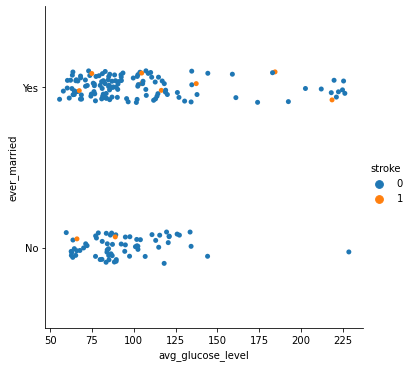

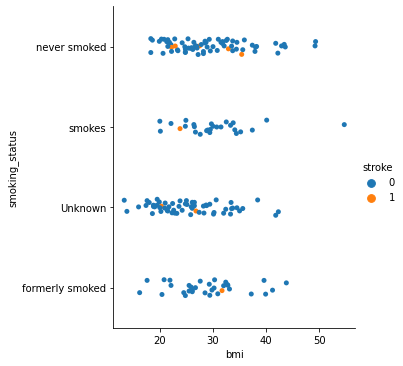

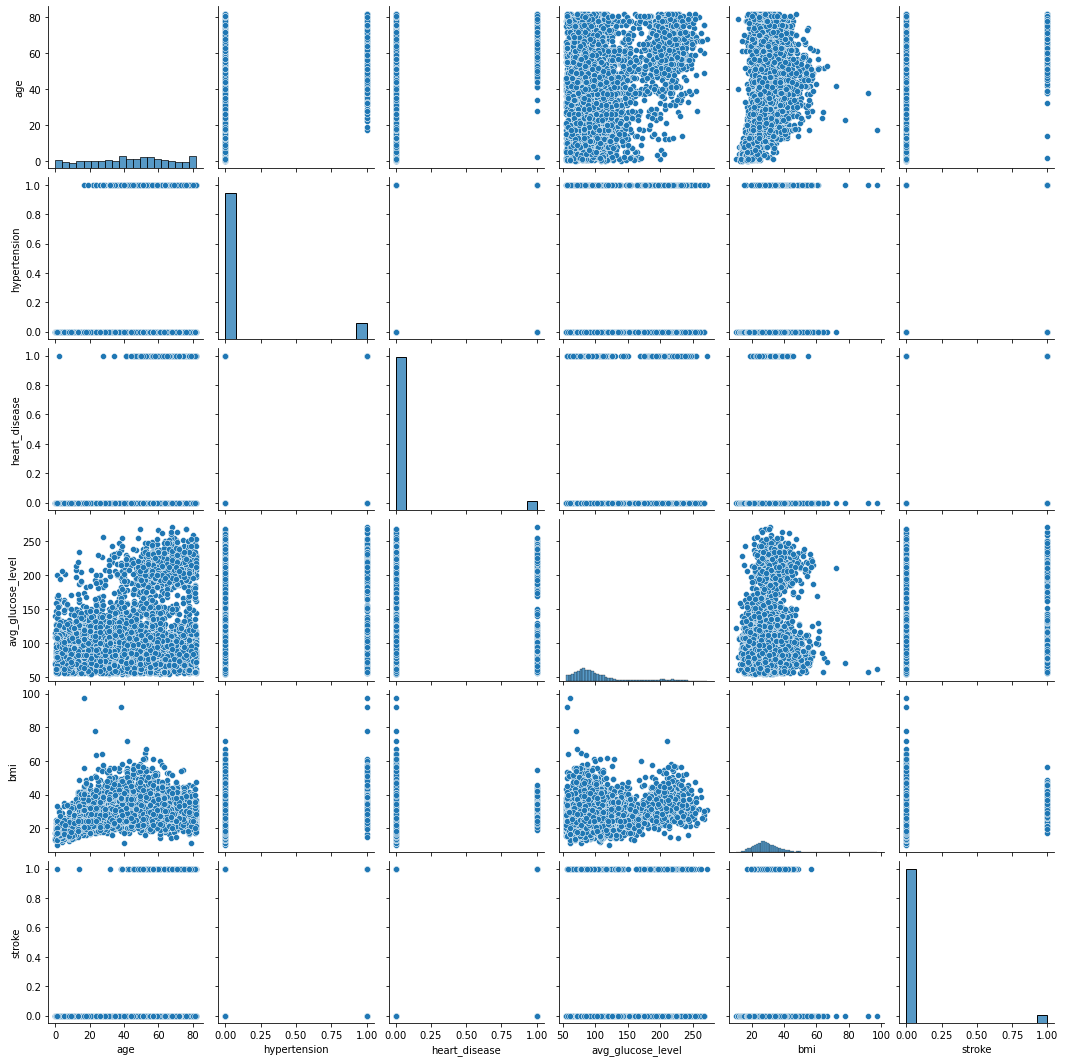

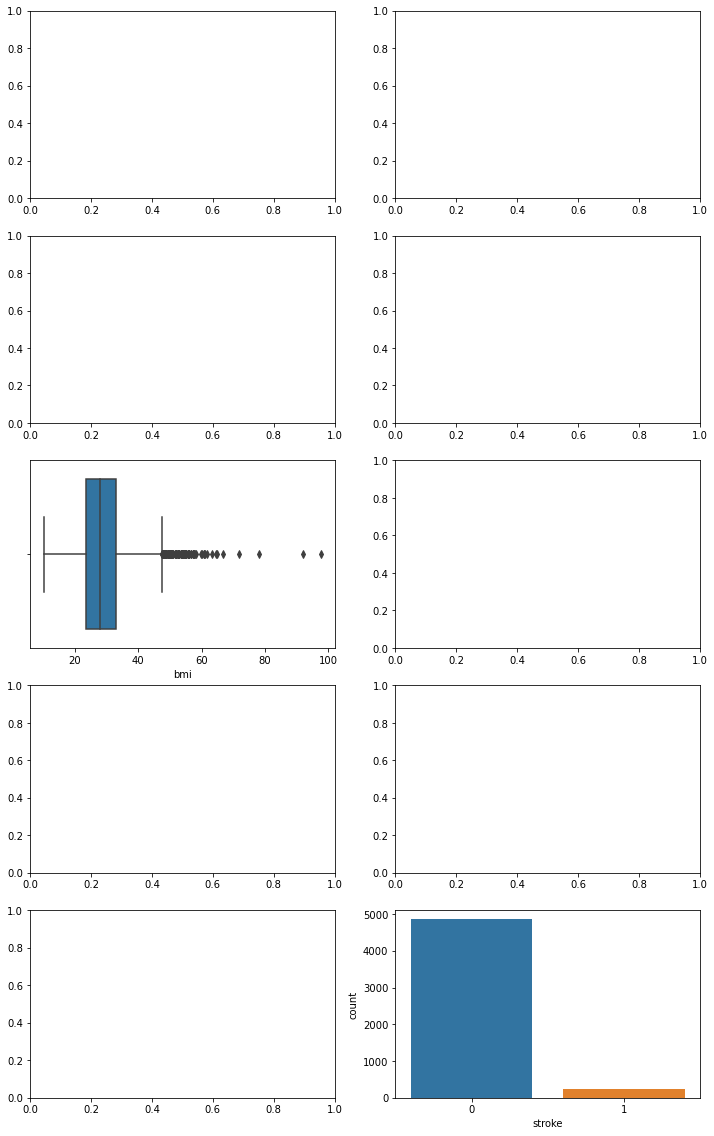

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split


stroke_data = pd.read_csv("healthcare-dataset-stroke-data.csv")
stroke_data_sample = pd.read_csv("healthcare-dataset-stroke-data.csv").sample(200, random_state=44)


X = stroke_data.drop('stroke', axis=1).drop('id', axis=1)
y = stroke_data['stroke']


#PLOTTING TAKES A WHILE
a = sns.catplot(x="avg_glucose_level", y="ever_married", hue="stroke", data=stroke_data_sample)
a = sns.catplot(x="bmi", y="smoking_status", hue="stroke", data=stroke_data_sample)

data = stroke_data.drop('id', axis=1)
a2 = sns.pairplot(data)

fig, axes = plt.subplots(nrows = 5, ncols = 2, figsize = (12, 20))
box = sns.boxplot(x = 'bmi', data = stroke_data, ax=axes[2][0])


class_imbalance = sns.countplot(x = y, data = stroke_data)

# Importing data


In [43]:

#read file
dataset = pd.read_csv(r"healthcare-dataset-stroke-data.csv")



In [44]:

dataset['smoking_status'].replace('Unknown', np.nan, inplace=True)

#check for any missing values
dataset.isna().sum()


dataset['bmi'].fillna(dataset['bmi'].mean(), inplace=True)
dataset['smoking_status'].fillna(dataset['smoking_status'].mode()[0], inplace = True)

dataset.isna().sum()


id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [45]:
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

One-hot encoding for work-type/residence/smoking/m-f (This one is currently not used!)


# One-hot-encoder

In [46]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
#gender
ct1 = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X = np.array(ct1.fit_transform(X))
#ever_married
ct2 = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [6])], remainder='passthrough')
X = np.array(ct2.fit_transform(X))
#work_type
ct3 = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [8])], remainder='passthrough')
X = np.array(ct3.fit_transform(X))
#Residence_type
ct4 = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [13])], remainder='passthrough')
X = np.array(ct4.fit_transform(X))
#smoking_status
ct5 = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [17])], remainder='passthrough')
X = np.array(ct5.fit_transform(X))



# Spliting data: (use the training sets for cross validation etc  (: )

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Scaling features (If needed: For now I used it!)

In [49]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_res = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# The SVC classifier: Training

In [57]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV 

param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
svcgrid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 

svcgrid.fit(X_train, y_train)


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   8.4s
[CV 2/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   8.0s
[CV 3/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   8.8s
[CV 4/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   5.5s
[CV 5/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   5.4s
[CV 1/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   1.9s
[CV 2/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   1.9s
[CV 3/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   1.4s
[CV 4/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   1.6s
[CV 5/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   2.0s
[CV 1/5] END ..................C=0.1, gamma=0.01, kernel=rbf; total time=   1.5s
[CV 2/5] END ..................C=0.1, gamma=0.0

[CV 2/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   1.9s
[CV 3/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   1.7s
[CV 4/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   1.9s
[CV 5/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   1.9s
[CV 1/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.3s
[CV 2/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.5s
[CV 3/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.5s
[CV 4/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.5s
[CV 5/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.5s
[CV 1/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.5s
[CV 2/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.9s
[CV 3/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.9s
[CV 4/5] END ...............

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

Some links that I used

In [9]:
#https://www.geeksforgeeks.org/svm-hyperparameter-tuning-using-gridsearchcv-ml/
#https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
#https://scikit-learn.org/0.15/modules/cross_validation.html

# Cross validation for the best estimator of the SVC classifier

In [58]:
from sklearn.model_selection import cross_val_score

#These are the best hyperparameters found during gridsearch
print(svcgrid.best_estimator_) 
#cross validation score for the best estimator currently found.
scores = cross_val_score(svcgrid.best_estimator_, X_train, y_train, cv=5)
scores
scores.mean()


SVC(C=10, gamma=1)


0.9616257147417541

Fit the model which we can use for testing

In [59]:
svcgrid.best_estimator_.fit(X_train, y_train)
# All results
means = svcgrid.cv_results_['mean_test_score']
stds = svcgrid.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, svcgrid.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
    
y_true, y_pred = y_test , svcgrid.predict(X_test)

from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_true, y_pred))

0.756 (+/-0.019) for {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
0.893 (+/-0.016) for {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
0.823 (+/-0.012) for {'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
0.757 (+/-0.015) for {'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}
0.537 (+/-0.148) for {'C': 0.1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.958 (+/-0.023) for {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
0.936 (+/-0.045) for {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.884 (+/-0.026) for {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
0.796 (+/-0.014) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.758 (+/-0.016) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.962 (+/-0.025) for {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
0.953 (+/-0.053) for {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
0.925 (+/-0.075) for {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
0.828 (+/-0.014) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.789 (+/-0.013) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.962 (+/-0.017) for {'C': 100, 'gamma': 1, 'kernel': 'rbf

# KNN classifier: Training

In [31]:
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
param_grid_knn = {'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39],  
              'weights': ['uniform', 'distance']
              }  
knngrid = GridSearchCV(KNeighborsClassifier(), param_grid_knn, refit = True, verbose = 3) 
knngrid.fit(X_train, y_train)




Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV 1/5] END .................n_neighbors=1, weights=uniform; total time=   0.3s
[CV 2/5] END .................n_neighbors=1, weights=uniform; total time=   0.3s
[CV 3/5] END .................n_neighbors=1, weights=uniform; total time=   0.2s
[CV 4/5] END .................n_neighbors=1, weights=uniform; total time=   0.2s
[CV 5/5] END .................n_neighbors=1, weights=uniform; total time=   0.2s
[CV 1/5] END ................n_neighbors=1, weights=distance; total time=   0.1s
[CV 2/5] END ................n_neighbors=1, weights=distance; total time=   0.1s
[CV 3/5] END ................n_neighbors=1, weights=distance; total time=   0.1s
[CV 4/5] END ................n_neighbors=1, weights=distance; total time=   0.2s
[CV 5/5] END ................n_neighbors=1, weights=distance; total time=   0.1s
[CV 1/5] END .................n_neighbors=3, weights=uniform; total time=   0.3s
[CV 2/5] END .................n_neighbors=3, we

[CV 2/5] END ................n_neighbors=21, weights=uniform; total time=   0.4s
[CV 3/5] END ................n_neighbors=21, weights=uniform; total time=   0.4s
[CV 4/5] END ................n_neighbors=21, weights=uniform; total time=   0.3s
[CV 5/5] END ................n_neighbors=21, weights=uniform; total time=   0.4s
[CV 1/5] END ...............n_neighbors=21, weights=distance; total time=   0.3s
[CV 2/5] END ...............n_neighbors=21, weights=distance; total time=   0.3s
[CV 3/5] END ...............n_neighbors=21, weights=distance; total time=   0.3s
[CV 4/5] END ...............n_neighbors=21, weights=distance; total time=   0.3s
[CV 5/5] END ...............n_neighbors=21, weights=distance; total time=   0.3s
[CV 1/5] END ................n_neighbors=23, weights=uniform; total time=   0.4s
[CV 2/5] END ................n_neighbors=23, weights=uniform; total time=   0.4s
[CV 3/5] END ................n_neighbors=23, weights=uniform; total time=   0.4s
[CV 4/5] END ...............

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                         23, 25, 27, 29, 31, 33, 35, 37, 39],
                         'weights': ['uniform', 'distance']},
             verbose=3)

In [39]:
# All results
means = knngrid.cv_results_['mean_test_score']
stds = knngrid.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, knngrid.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
    
y_true, y_pred = y_test , knngrid.predict(X_test)

from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_true, y_pred))

0.969 (+/-0.017) for {'n_neighbors': 1, 'weights': 'uniform'}
0.969 (+/-0.017) for {'n_neighbors': 1, 'weights': 'distance'}
0.945 (+/-0.023) for {'n_neighbors': 3, 'weights': 'uniform'}
0.952 (+/-0.018) for {'n_neighbors': 3, 'weights': 'distance'}
0.930 (+/-0.019) for {'n_neighbors': 5, 'weights': 'uniform'}
0.943 (+/-0.013) for {'n_neighbors': 5, 'weights': 'distance'}
0.915 (+/-0.023) for {'n_neighbors': 7, 'weights': 'uniform'}
0.935 (+/-0.017) for {'n_neighbors': 7, 'weights': 'distance'}
0.904 (+/-0.027) for {'n_neighbors': 9, 'weights': 'uniform'}
0.929 (+/-0.020) for {'n_neighbors': 9, 'weights': 'distance'}
0.894 (+/-0.030) for {'n_neighbors': 11, 'weights': 'uniform'}
0.925 (+/-0.019) for {'n_neighbors': 11, 'weights': 'distance'}
0.890 (+/-0.032) for {'n_neighbors': 13, 'weights': 'uniform'}
0.921 (+/-0.019) for {'n_neighbors': 13, 'weights': 'distance'}
0.883 (+/-0.032) for {'n_neighbors': 15, 'weights': 'uniform'}
0.916 (+/-0.018) for {'n_neighbors': 15, 'weights': 'dista

## knn visualization of different values for K

Automatically created module for IPython interactive environment


Text(0, 0.5, 'Mean Error')

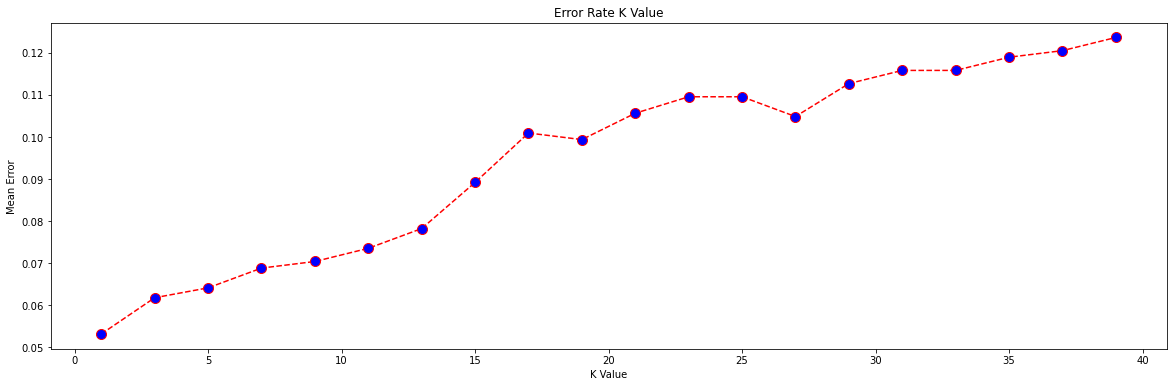

In [35]:
# resource: https://stackabuse.com/k-nearest-neighbors-algorithm-in-python-and-scikit-learn/

print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

error = []

# Calculating error for K values between 1 and 40
for i in [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39]:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(20, 6))
plt.plot([1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39], error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

# Cross validation for the best estimator of the KNN classifier

In [36]:
from sklearn.model_selection import cross_val_score

#These are the best hyperparameters found during gridsearch
print(knngrid.best_estimator_) 
#cross validation score for the best estimator currently found.
scores2 = cross_val_score(knngrid.best_estimator_, X_res, y_res, cv=5)
scores2
scores2.mean()

KNeighborsClassifier(n_neighbors=1)


0.9690256978414565

Fit the model which we can use for testing

In [37]:
knngrid.best_estimator_.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

# Simple neural network - training and testing

In [16]:

from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(n_samples=100, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,random_state=1)
clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)
clf.predict_proba(X_test[:1])
clf.predict(X_test[:5, :])
clf.score(X_test, y_test)



0.88

## grid search for mlp classifier

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(max_iter=100)

parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
clf.fit(X_res, y_res)

# Best paramete set
print('Best parameters found:\n', clf.best_params_)

# All results
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
    
y_true, y_pred = y_test , clf.predict(X_test)

from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_true, y_pred))


from sklearn.learning_curve import validation_curve
degree = np.arange(0, 21)
train_score, val_score = validation_curve(PolynomialRegression(), X, y,
                                          'polynomialfeatures__degree', degree, cv=7)

plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

## f1 score

In [27]:
from sklearn.metrics import f1_score

# the average parameter can take many different arguements. In this case we used weighted which calculates 
# the metrics for each label, and find their average weighted by support (the number of true instances for 
# each label). This alters ‘macro’ to account for label imbalance; it can result in an F-score that is not 
# between precision and recall.
f1_score(y_true, y_pred, average='weighted')


0.9192207792207792

## precision score

In [29]:
from sklearn.metrics import precision_score
# there are many different arguements for the average paramter but we stuck with 'weighted' as in the f1 score. 
precision_score(y_true, y_pred, average='weighted')

0.9306666666666666

## rerun the test and see the increased accuracy


In [24]:
clf.score(X_test, y_test)

0.92

In [ ]:
#links i used:
#https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
#https://datascience.stackexchange.com/questions/36049/how-to-adjust-the-hyperparameters-of-mlp-classifier-to-get-more-perfect-performa